In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("./Train/Train.csv")

In [5]:
dataset.shape

(40000, 2)

In [6]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [7]:
dataset['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
y = dataset['label'].values

In [10]:
dataset[dataset['label'].values == 'pos']

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos
...,...,...
39990,"In the year 2006, ""In Cold Blood""-a riveting t...",pos
39991,The creators of south park in their own film h...,pos
39994,This was a great movie! Even though there was ...,pos
39998,"""Lifeforce"" is a truly bizarre adaptation of t...",pos


In [11]:
y = le.fit_transform(y)

In [12]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [13]:

dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anirudh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anirudh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anirudh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [16]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [17]:
##cleaning Text

In [18]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />","")
    sample = re.sub("[^a-zA-Z]+"," ",sample)
    sample = sample.split()
    sample = [ps.stem(s) for s in sample if s is not sw]
    sample = " ".join(sample)
    return sample

In [19]:
clean_text(dataset['review'][11])

'robert jordan is a televis star robert jordan like thing orderli on time and properli execut in hi world children are to be seen not heard so whi would mr jordan want to becom the master of a rambuncti band of boy scout rate hi staff figur that if learn how to interact with the youth they will be more inclin to watch hi show of cours watch jordan cope compris most of the fun like mr belveder and mr belveder goe to colleg thi one is sure to pleas anyon interest in obtain a copi of thi film pleas write to me at iamas yahoo com'

In [20]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [21]:
dataset['cleaned_review'] = dataset['review'].apply(clean_text)

In [22]:
corpus = dataset['cleaned_review'].values

In [23]:
corpus[11]

'robert jordan is a televis star robert jordan like thing orderli on time and properli execut in hi world children are to be seen not heard so whi would mr jordan want to becom the master of a rambuncti band of boy scout rate hi staff figur that if learn how to interact with the youth they will be more inclin to watch hi show of cours watch jordan cope compris most of the fun like mr belveder and mr belveder goe to colleg thi one is sure to pleas anyon interest in obtain a copi of thi film pleas write to me at iamas yahoo com'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [25]:
cv = CountVectorizer(max_df = 0.5, max_features = 500000)

In [26]:
X = cv.fit_transform(corpus)

In [27]:
X[0]

<1x64140 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [28]:
tfidf = TfidfTransformer()

In [29]:
X = tfidf.fit_transform(X)

In [30]:
print(X[0])

  (0, 61766)	0.5577181008807582
  (0, 58760)	0.3305382119527307
  (0, 57761)	0.205670269057422
  (0, 55188)	0.07900330401161072
  (0, 53985)	0.3069602176208867
  (0, 51040)	0.11327062286292523
  (0, 49500)	0.05995645167299778
  (0, 42145)	0.08622256231913283
  (0, 40350)	0.3305382119527307
  (0, 35556)	0.1790485335755207
  (0, 34859)	0.17345328530766352
  (0, 33799)	0.1642046551133621
  (0, 33101)	0.07404938966753422
  (0, 27636)	0.13537881638110366
  (0, 26722)	0.055828234901552067
  (0, 25298)	0.1262183843024967
  (0, 9937)	0.18763332218309603
  (0, 9505)	0.1654866574550757
  (0, 9032)	0.3305382119527307


In [31]:
X.shape

(40000, 64140)

In [32]:
y.shape

(40000,)

In [33]:
##**Neural Network**

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

In [44]:
tf.compat.v1.disable_eager_execution()
print(tf.compat.v1.get_default_graph())

In [46]:
model = Sequential()
model.add( Dense(16,activation = "relu", input_shape= (X.shape[1],)))
model.add( Dense(16,activation = "relu"))
model.add( Dense(1, activation = "sigmoid"))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1026256   
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,026,545
Trainable params: 1,026,545
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [52]:
X.shape

(40000, 64140)

In [56]:
X[:50]

<50x64140 sparse matrix of type '<class 'numpy.float64'>'
	with 5369 stored elements in Compressed Sparse Row format>

In [57]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [61]:
X_train

<35000x64140 sparse matrix of type '<class 'numpy.float64'>'
	with 3927230 stored elements in Compressed Sparse Row format>

In [62]:
hist = model.fit(X,y,batch_size=16,epochs = 2, validation_data = (X_val,y_val))

Train on 40000 samples, validate on 5000 samples
Epoch 1/2
39984/40000 [============================>.] - ETA: 0s - loss: 0.3018 - accuracy: 0.8811

C:\Users\Anirudh\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


40000/40000 [==============================] - 159s 4ms/sample - loss: 0.3017 - accuracy: 0.8811 - val_loss: 0.1289 - val_accuracy: 0.9584
Epoch 2/2
40000/40000 [==============================] - 172s 4ms/sample - loss: 0.1461 - accuracy: 0.9472 - val_loss: 0.0729 - val_accuracy: 0.9816


In [71]:
hist1 = model.fit(X,y,batch_size=128,epochs = 2, validation_data = (X_val,y_val))

Train on 40000 samples, validate on 5000 samples
Epoch 1/2
40000/40000 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.98 - 95s 2ms/sample - loss: 0.0604 - accuracy: 0.9838 - val_loss: 0.0484 - val_accuracy: 0.9902
Epoch 2/2
40000/40000 [==============================] - 129s 3ms/sample - loss: 0.0481 - accuracy: 0.9883 - val_loss: 0.0375 - val_accuracy: 0.9928


In [63]:
result = hist.history

In [64]:
print(result)

{'loss': [0.3016814779795706, 0.14608332420922815], 'accuracy': [0.881075, 0.947175], 'val_loss': [0.12892984937429428, 0.07287168029844761], 'val_accuracy': [0.9584, 0.9816]}


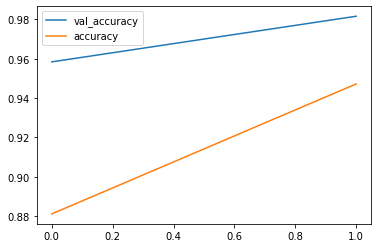

In [67]:
plt.plot(result['val_accuracy'],label = "val_accuracy")
plt.plot(result['accuracy'], label = "accuracy")
plt.legend()
plt.show()

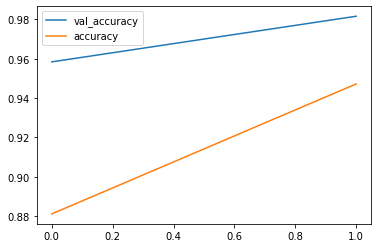

In [74]:
result1 = hist.history
plt.plot(result1['val_accuracy'],label = "val_accuracy")
plt.plot(result1['accuracy'], label = "accuracy")
plt.legend()
plt.show()

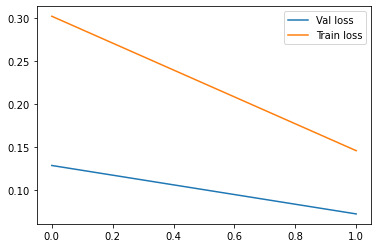

In [75]:
plt.plot(result1['val_loss'], label = "Val loss")
plt.plot(result1['loss'], label = "Train loss")
plt.legend()
plt.show()

In [76]:
model.evaluate(X_val,y_val)

[0.03746250736117363, 0.9928]

In [ ]:
##TEST TIME

In [139]:
review = [[input("Enter review")]]

Enter reviewworst packaging atta leaked


In [134]:
#review = [["The product is kind of with flies n something else. Ordered first time as it's organic but disappointed. never faced earlier like this as I am a regular customer."]]


In [140]:
test = pd.DataFrame(review,columns=['Review'])

test.head()

test['Cleaned_Review'] = test['Review'].apply(clean_text)

#test1 = pd.read_csv("./Test/Test.csv")


X_test = test['Cleaned_Review']

X_test = cv.transform(X_test)

#X_test1 = test1['Cleaned_Review'] = test1['review'].apply(clean_text)
#X_test1 = tfidf.transform(X_test1)

X_test = tfidf.transform(X_test)

print(X_test)

y_pred = model.predict(X_test)

y_pred[y_pred >=0.5] = 1

y_pred = y_pred.astype('int')

y_pred[:]

dic = {0 : 'negative' , 1 : 'positive'}
y_pred = [ dic[p[0]] for p in y_pred ]


y_pred

  (0, 62919)	0.22597993922638507
  (0, 41060)	0.4215544221762847
  (0, 31771)	0.5033414293664842
  (0, 3299)	0.719633477330066


['negative']